In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# **Exploratory Data Analysis**

Import necessary libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Load data

In [3]:
df = pd.read_csv('/content/drive/My Drive/Masters Thesis/data/attribution_data.csv')
df.head()

,cookie,time,interaction,conversion,conversion_value,channel
0,00000FkCnDfDDf0iC97iC703B,2018-07-03T13:02:11Z,impression,0,0.0,Instagram
1,00000FkCnDfDDf0iC97iC703B,2018-07-17T19:15:07Z,impression,0,0.0,Online Display
2,00000FkCnDfDDf0iC97iC703B,2018-07-24T15:51:46Z,impression,0,0.0,Online Display
3,00000FkCnDfDDf0iC97iC703B,2018-07-29T07:44:51Z,impression,0,0.0,Online Display
4,0000nACkD9nFkBBDECD3ki00E,2018-07-03T09:44:57Z,impression,0,0.0,Paid Search


**Column Description**

* Cookie: User ID used to track each customer
* Time: Timestamp of interaction of each touchpoint
* Interaction: Categorical variable indicating the type of interaction by the user
* Conversion: Boolean variable indicating whether a user conversion has occurred
* Conversion Value: Revenue associated with each potential conversion event
* Channel: Marketing channel through which the user has interacted with


## **Data Inspection**

In [ ]:
print("No. of touchpoints:", len(df))

No. of touchpoints: 586737


**Data types and overall summary of the dataset**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 586737 entries, 0 to 586736
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   cookie            586737 non-null  object 
 1   time              586737 non-null  object 
 2   interaction       586737 non-null  object 
 3   conversion        586737 non-null  int64  
 4   conversion_value  586737 non-null  float64
 5   channel           586737 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 26.9+ MB


There are no missing values in the dataset

## **Data Summary**

### **Distinct Values**

In [ ]:
df_freq = pd.DataFrame(df.nunique(), columns=['Count'])
df_freq.index.name = 'Column Name'
df_freq

,Count
Column Name,
cookie,240108
time,485110
interaction,2
conversion,2
conversion_value,11
channel,5


There are 240,108 cookies, which is indicative of the number of users in this dataset.
There are 2 types of interactions and 2 boolean values to indicate conversion status, along with 5 channels.

In [ ]:
# Convert timestamp to DateTime object
df['time'] = pd.to_datetime(df['time'])
# Extract date
df['date'] = df['time'].dt.date

In [ ]:
# Get the date range
start_date = df['date'].min()
end_date = df['date'].max()

print("Date range:", start_date.strftime('%d %B %Y'), "-", end_date.strftime('%d %B %Y'))

Date range: 01 July 2018 - 31 July 2018


### **Frequency Counts**

The types of interactions and their frequency counts are as follows:

In [ ]:
df['interaction'].value_counts()

,count
interaction,
impression,569098
conversion,17639


The frequency counts of conversion are as follows:

In [ ]:
df['conversion'].value_counts()

,count
conversion,
0,569098
1,17639


The frequency counts for the interaction and conversion columns are identical because, in the dataset, a conversion interaction specifically signifies a conversion event, while an impression is simply an impression and does not indicate a conversion.

And, a huge imbalance is observed, which will be addressed in the analysis and models.

The frequency counts of the channels are as follows:

In [ ]:
df['channel'].value_counts()

,count
channel,
Facebook,175741
Paid Search,151440
Online Video,113302
Instagram,75201
Online Display,71053


Facebook and Paid Search have the highest counts, indicating they are the most prominent channels. Online Video follows with a moderate count, while Instagram and Online Display have the lowest counts.

**Barchart of Channel Distribution**

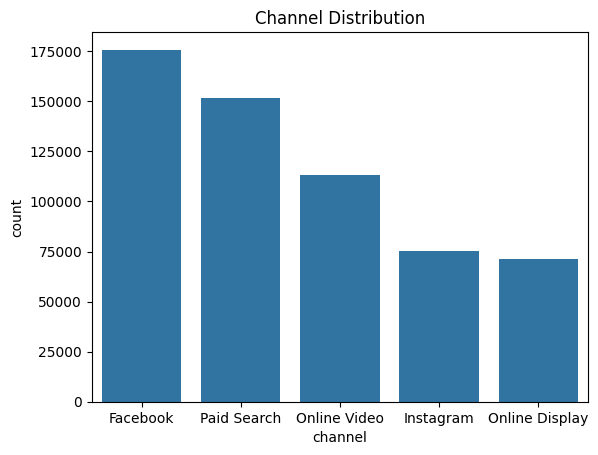

In [ ]:
channel_counts_index = df['channel'].value_counts().index
sns.countplot(x='channel', data=df, order = channel_counts_index)
plt.title('Channel Distribution')
plt.show()

**Grouped Barchart of Channel Distribution by Conversion Status**

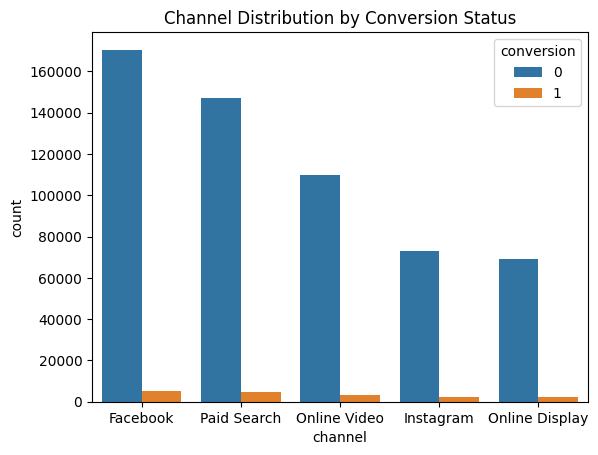

In [ ]:
sns.countplot(x='channel', hue='conversion', data=df, order=channel_counts_index)
plt.title('Channel Distribution by Conversion Status')
plt.show()

**Barchart of Channel Distribution for Converted Touchpoints**

In [ ]:
# Filter for converted touchpoints only
df_converted = df[df['conversion'] == 1]

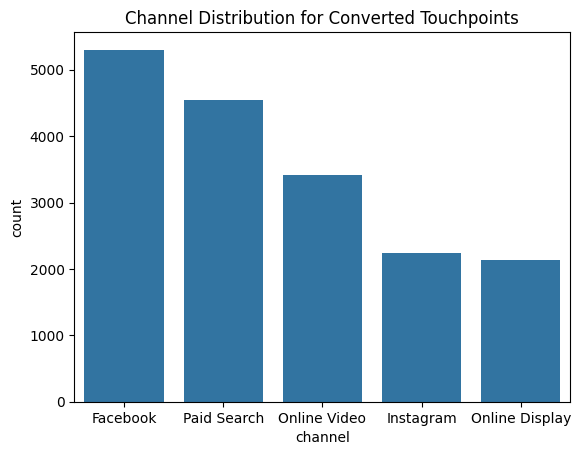

In [ ]:
# Distribution of conversions by channel for class 1
converted_channel_counts_index = df_converted['channel'].value_counts().index
sns.countplot(x='channel', data=df_converted, order = converted_channel_counts_index)
plt.title('Channel Distribution for Converted Touchpoints')
plt.show()

### **Summary Statistics**

Summary statistics computed for numerical feature: `conversion_value`, grouped by conversion status

In [ ]:
df.groupby('conversion')['conversion_value'].describe()

,count,mean,std,min,25%,50%,75%,max
conversion,,,,,,,,
0,569098.0,0.000000,0.00000,0.0,0.0,0.0,0.0,0.0
1,17639.0,6.249277,1.11496,4.0,5.5,6.5,7.0,8.5


For non-converted touchpoints, the conversion value is zero, which makes sense because these touchpoints did not result in a conversion event.

For converted touchpoints, the minimum value is 4, the maximum is 8.5, and the mean is approximately 6.25. This indicates that among touchpoints where conversions did occur, the conversion values fall within this range, with most values clustering around the mean. The spread between the minimum and maximum values suggests variability in the conversion values for different touchpoints that led to a conversion.

**Boxplot of Conversion Values for Converted Touchpoints**

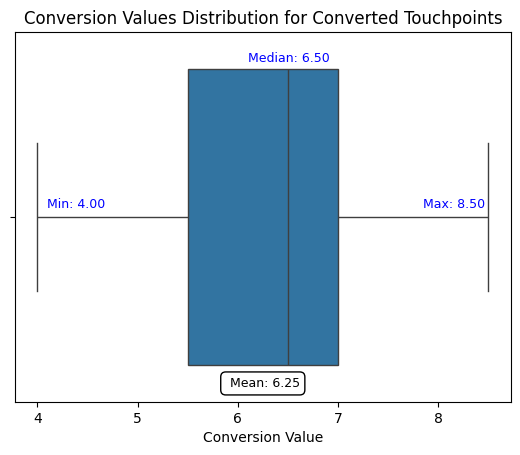

In [ ]:
# Calculate descriptive statistics
min_val = df_converted['conversion_value'].min()
mean_val = df_converted['conversion_value'].mean()
median_val = df_converted['conversion_value'].median()
max_val = df_converted['conversion_value'].max()

# Create boxplot
sns.boxplot(x=df_converted['conversion_value'])
plt.title('Conversion Values Distribution for Converted Touchpoints')
plt.xlabel('Conversion Value')

# Add text annotations for descriptive statistics
plt.text(min_val+0.1, -0.025, f'Min: {min_val:.2f}', fontsize=9, color='blue')
plt.annotate(f' Mean: {round(mean_val,2)}', xy=(mean_val, 0.46),
             bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.4'),
             horizontalalignment='center', fontsize=9, color='black')
plt.text(median_val-0.4, -0.42, f'Median: {median_val:.2f}', fontsize=9, color='blue')
plt.text(max_val-0.65, -0.025, f'Max: {max_val:.2f}', fontsize=9, color='blue')

plt.show()

## **Temporal Data Visualization**

### **Time Series of Conversions**

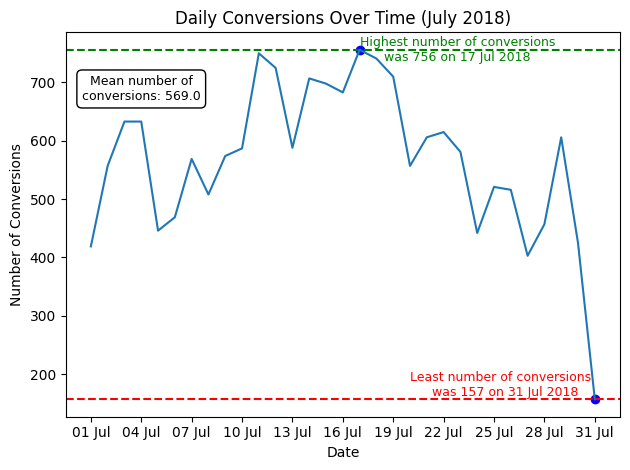

In [ ]:
# Calculate the number of conversions over time (by date)
daily_conversions = df.groupby('date')['conversion'].sum()

# Calculate min, max, and mean values
min_conversions = daily_conversions.min()
max_conversions = daily_conversions.max()
mean_conversions = daily_conversions.mean()

# Find the dates corresponding to the min, max, and mean values
min_date = daily_conversions[daily_conversions == min_conversions].index[0]
max_date = daily_conversions[daily_conversions == max_conversions].index[0]
mean_date = daily_conversions.index[daily_conversions == mean_conversions].tolist()[0]

# Highlight the min conversion date with a dot, add horizontal lines and add text labels for min conversions
plt.plot(min_date, min_conversions, 'bo', markersize=6)
plt.axhline(min_conversions, color='r', linestyle='--')
plt.text(min_date, min_conversions,
         f'Least number of conversions \nwas {min_conversions} on {min_date:%d %b %Y}    ',
         color='r', verticalalignment='bottom', horizontalalignment='right', fontsize=9)

# Highlight the min conversion date with a dot, add horizontal lines and add text labels for max conversions
plt.plot(max_date, max_conversions, 'bo', markersize=6)
plt.axhline(max_conversions, color='g', linestyle='--')
plt.text(max_date, max_conversions-25,
         f'Highest number of conversions \n      was {max_conversions} on {max_date:%d %b %Y}',
         color='g', verticalalignment='bottom', horizontalalignment='left', fontsize=9)

# Highlight the mean conversion value with an annotation box
plt.annotate(f' Mean number of \nconversions: {mean_conversions}', xy=('2018-07-04', 670),
             bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.4'),
             horizontalalignment='center', fontsize=9, color='black')

# Format x-axis to show only every 5 days with day and month format
plt.gca().xaxis.set_major_formatter(plt.matplotlib.dates.DateFormatter('%d %b'))
plt.gca().xaxis.set_major_locator(plt.matplotlib.dates.DayLocator(interval=3))

# Plot data and set labels and title
daily_conversions.plot()
plt.title('Daily Conversions Over Time (July 2018)')
plt.xlabel('Date')
plt.ylabel('Number of Conversions')
plt.tight_layout()
plt.show()

### **Conversion Distribution by Channel Over Time**

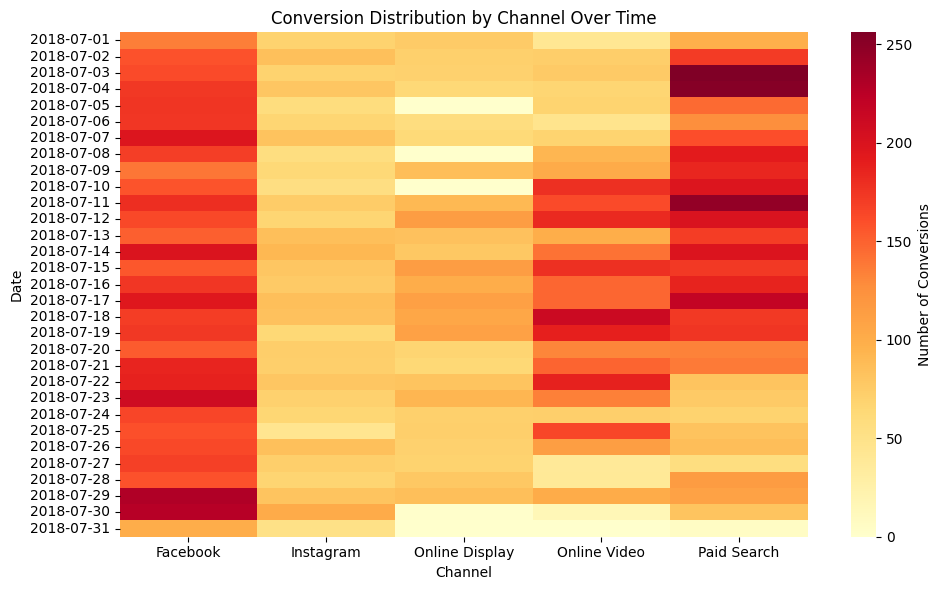

In [ ]:
# Group by date and channel, then sum conversions
heatmap_data = df.groupby(['date', 'channel'])['conversion'].sum().unstack()

# Plot a heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(heatmap_data, cmap='YlOrRd', cbar_kws={'label': 'Number of Conversions'})
plt.title('Conversion Distribution by Channel Over Time')
plt.xlabel('Channel')
plt.ylabel('Date')
plt.tight_layout()
plt.show()

In [ ]:
print("Heatmap data summary:")
print(heatmap_data.describe())

Heatmap data summary:
channel    Facebook   Instagram  Online Display  Online Video  Paid Search
count     31.000000   31.000000       31.000000     31.000000    31.000000
mean     171.000000   72.387097       69.000000    109.935484   146.677419
std       25.704734   12.424914       34.520525     57.308484    61.953416
min      100.000000   44.000000        0.000000      0.000000     6.000000
25%      158.000000   65.500000       63.500000     68.000000    92.000000
50%      169.000000   72.000000       72.000000    102.000000   160.000000
75%      182.000000   81.500000       88.000000    155.000000   188.500000
max      230.000000  102.000000      114.000000    211.000000   256.000000


# **User Touchpoint Visit Analysis**

In [4]:
def calculate_visit_order_and_totals(df):
  # Convert time to DateTime object
  df['time'] = pd.to_datetime(df['time'])

  # calculate order of visit per cookie based on time order
  df = df.sort_values(['cookie', 'time'], ascending=[False, True])
  df['visit_order'] = df.groupby('cookie').cumcount() + 1
  # calculate total visits by each cookie
  df['total_visits'] = df.groupby('cookie')['visit_order'].transform('max')
  return df

In [5]:
# Classify visit position
def classify_visit_position(row):
    if row['visit_order'] == 1:
        # if there is only one visit, assign as single visit
        if row['total_visits'] == 1:
            return 'single visit'
        else:
            return 'first visit'
    elif row['visit_order'] == row['total_visits']:
        return 'last visit'
    else:
        return 'mid pathway'

In [6]:
# For all single visits, assign it as 'first visit' and 'last visit'
def label_single_visits(df):
  # Create a copy of rows where 'visit_position' is 'single visit'
  single_visits = df[df['visit_position'] == 'single visit'].copy()

  # Modify the copy to represent 'first touch'
  single_visits_first = single_visits.copy()
  single_visits_first['visit_position'] = 'first visit'

  # Modify the copy to represent 'last touch'
  single_visits_last = single_visits.copy()
  single_visits_last['visit_position'] = 'last visit'

  # Append the modified copies to the original DataFrame
  df = pd.concat([df, single_visits_first, single_visits_last], ignore_index=True)
  # Remove all 'single visits'
  df = df[df['visit_position'] != 'single visit']
  # Sort again
  df = df.sort_values(['cookie', 'time'], ascending=[False, True])
  return df

In [7]:
# reference: https://www.geeksforgeeks.org/highlight-the-maximum-value-in-each-column-in-pandas/
def highlight_max(s):
    is_max = s == s.max()
    return ['background-color: lightgreen' if v else '' for v in is_max]

### For entire dataset

In [8]:
df = pd.read_csv('/content/drive/My Drive/Masters Thesis/data/attribution_data.csv')
df = calculate_visit_order_and_totals(df)

In [9]:
# Apply function to classify visit position and label single visits accurately
df['visit_position'] = df.apply(classify_visit_position, axis=1)
df = label_single_visits(df)

# Count the visit positions for each channel
visit_counts = df.groupby(['channel', 'visit_position']).size().unstack(fill_value=0)
visit_counts = visit_counts[['first visit', 'mid pathway', 'last visit']]

# Calculate total visits for each channel
visit_counts['total'] = visit_counts.sum(axis=1)
# Highlight channel with largest number of counts in each visit type
visit_counts.style.apply(highlight_max, subset=['first visit', 'mid pathway', 'last visit'], axis=0)

visit_position,first visit,mid pathway,last visit,total
channel,,,,
Facebook,66848,74635,69114,210597
Instagram,28618,31960,29600,90178
Online Display,34250,21181,34612,90043
Online Video,34182,59285,35136,128603
Paid Search,76210,42924,71646,190780


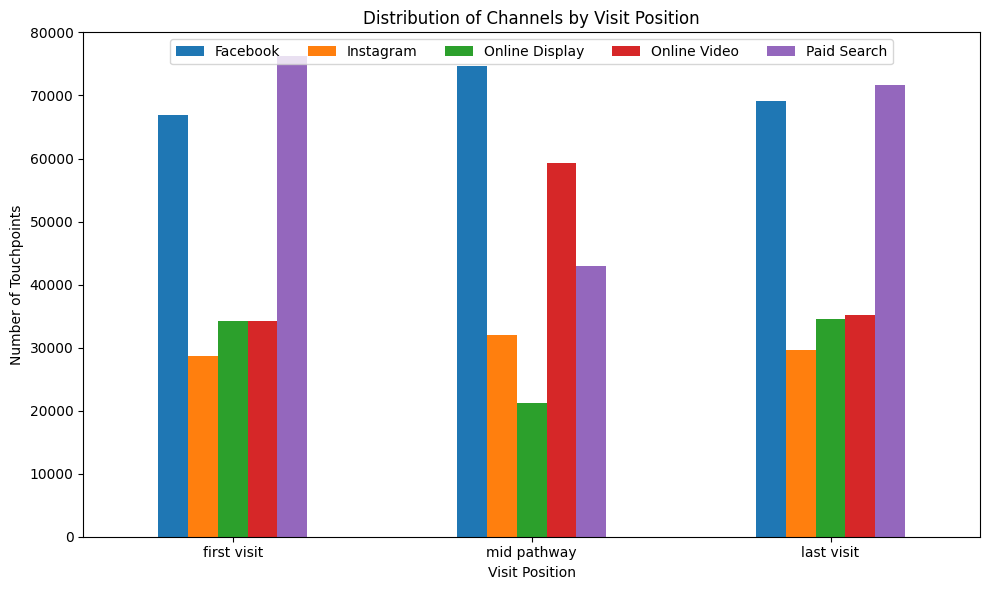

In [10]:
# Visualize as a graph
# Transpose the DataFrame to have visit type as index and channels as columns
visit_counts_transposed = visit_counts[['first visit', 'mid pathway', 'last visit']].transpose()

# Plot the transposed DataFrame
visit_counts_transposed.plot(kind='bar', figsize=(10, 6))
plt.title('Distribution of Channels by Visit Position')
plt.xlabel('Visit Position')
plt.ylabel('Number of Touchpoints')
plt.xticks(rotation=0)
plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1), ncol=5)
plt.tight_layout()
plt.show()

### For converted

In [11]:
df = pd.read_csv('/content/drive/My Drive/Masters Thesis/data/attribution_data.csv')
df = calculate_visit_order_and_totals(df)

In [12]:
df_paths = df.groupby('cookie')['channel'].aggregate(lambda x: x.tolist()).reset_index()
df_last_interaction = df.drop_duplicates('cookie', keep='last')[['cookie', 'conversion','total_visits']]
df_paths = pd.merge(df_paths, df_last_interaction, how='left', on='cookie')
df_paths['path'] = df_paths['channel'].apply(lambda x: ' > '.join(x))
df_paths.drop(columns = ['channel'], inplace = True)

In [13]:
# select cookies in original dataset which are converted events only
converted = df_paths[df_paths['conversion'] == 1]['cookie']
df_converted = df[df['cookie'].isin(converted)]

In [15]:
# Apply function to classify visit position and label single visits accurately
df_converted['visit_position'] = df_converted.apply(classify_visit_position, axis=1)
df_converted = label_single_visits(df_converted)

# Count the visit positions for each channel
visit_counts_converted = df_converted.groupby(['channel', 'visit_position']).size().unstack(fill_value=0)
visit_counts_converted = visit_counts_converted[['first visit', 'mid pathway', 'last visit']]

# Calculate total visits for each channel
visit_counts_converted['total'] = visit_counts_converted.sum(axis=1)
# Highlight channel with largest number of counts in each visit type
visit_counts_converted.style.apply(highlight_max, subset=['first visit', 'mid pathway', 'last visit'], axis=0)

visit_position,first visit,mid pathway,last visit,total
channel,,,,
Facebook,7231,13040,7355,27626
Instagram,3234,5489,3149,11872
Online Display,3215,2136,3194,8545
Online Video,4243,11506,4435,20184
Paid Search,7133,4414,6923,18470


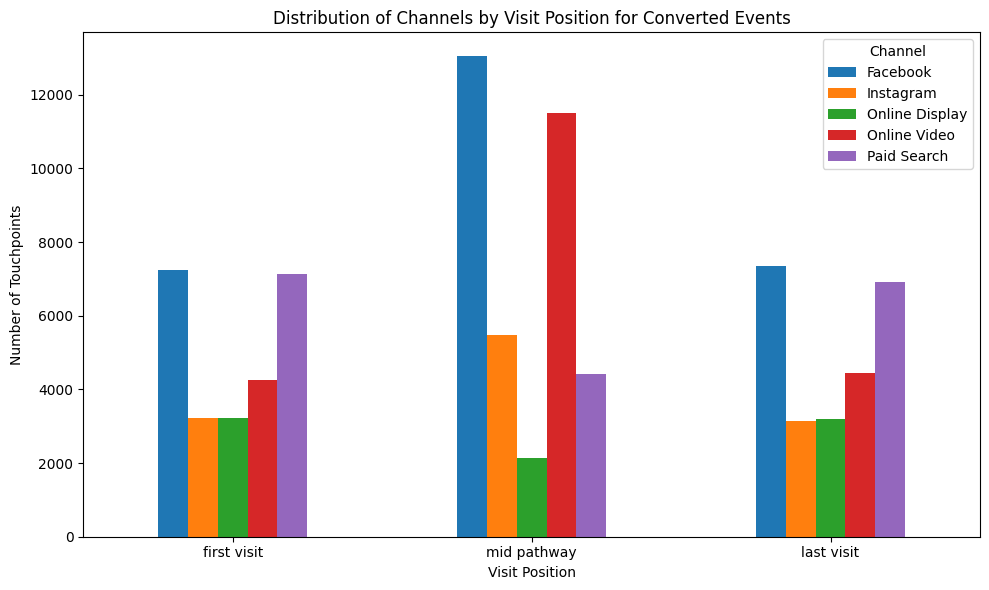

In [16]:
# Visualize as a graph
# Transpose the DataFrame to have visit type as index and channels as columns
visit_counts_transposed = visit_counts_converted[['first visit', 'mid pathway', 'last visit']].transpose()

# Plot the transposed DataFrame
visit_counts_transposed.plot(kind='bar', figsize=(10, 6))
plt.title('Distribution of Channels by Visit Position for Converted Events')
plt.xlabel('Visit Position')
plt.ylabel('Number of Touchpoints')
plt.xticks(rotation=0)
plt.legend(title='Channel')
plt.tight_layout()
plt.show()

# **User Journey Analysis**

## Overall Conversion Rate

In [ ]:
# Load dataset
df = pd.read_csv('/content/drive/My Drive/Masters Thesis/data/attribution_data.csv')
# Convert time to DateTime object
df['time'] = pd.to_datetime(df['time'])

In [ ]:
df_paths = df.groupby('cookie')['channel'].aggregate(lambda x: x.tolist()).reset_index()
df_last_interaction = df.drop_duplicates('cookie', keep='last')[['cookie', 'conversion']]
df_paths = pd.merge(df_paths, df_last_interaction, how='left', on='cookie')
df_paths.drop(columns = ['cookie'], inplace = True)

In [ ]:
print("No. of user paths: ", len(df_paths))
total_conversions = sum(df_paths['conversion'])
print("No. of conversions: ", total_conversions)
base_conversion_rate = total_conversions / len(df_paths)
print("Conversion rate:", round(base_conversion_rate * 100, 2), "%")

No. of user paths:  240108
No. of conversions:  17639
Conversion rate: 7.35 %


## Conversion Rates Across User Journey Paths

In [ ]:
def fun(df, unique):
  if unique == True:
    df_paths = df.groupby('cookie')['channel'].aggregate(lambda x: x.unique().tolist()).reset_index()
  else:
    df_paths = df.groupby('cookie')['channel'].aggregate(lambda x: x.tolist()).reset_index()
  df_last_interaction = df.drop_duplicates('cookie', keep='last')[['cookie', 'conversion']]
  df_paths = pd.merge(df_paths, df_last_interaction, how='left', on='cookie')
  df_paths.drop(columns = ['cookie'], inplace = True)

  df_pathways = df_paths.copy()
  df_pathways['path'] = df_pathways['channel'].apply(lambda x: ' > '.join(x))
  df_pathways.drop('channel', axis=1, inplace=True)

  print("Total user paths: ", len(df_pathways), "\nNo. of unique user paths:", len(df_pathways['path'].unique()))

  # Calculate conversion rate
  # sum: all converted users through path x, count: all users through path x
  path_conversions = df_pathways.groupby('path')['conversion'].agg(['sum', 'count'])
  path_conversions['conversion_rate'] = round(path_conversions['sum'] / path_conversions['count'], 3) * 100
  # formatted conversion rate
  path_conversions['conversion_rate'] = path_conversions['conversion_rate'].apply(lambda x: f"{x:.1f}%")
  return path_conversions

### with repeating channels in the paths

In [ ]:
result = fun(df, unique=False)

Total user paths:  240108 
No. of unique user paths: 11374


In [ ]:
# Sort by conversions in descending order of number of converted events (sum)
result = result.sort_values('sum', ascending=False)
result.head(10)

,sum,count,conversion_rate
path,,,
Paid Search,2376,39340,6.0%
Facebook,2054,34856,5.9%
Online Display,1055,18990,5.6%
Online Video,1027,15301,6.7%
Instagram,905,14977,6.0%
Paid Search > Paid Search,818,15515,5.3%
Facebook > Facebook,538,7948,6.8%
Online Video > Online Video,437,5486,8.0%
Online Video > Online Video > Online Video,292,2849,10.2%


In [ ]:
# Sort by conversions in descending order of path-based conversion rate
result = result.sort_values('conversion_rate', ascending=False)
result.head(10)

,sum,count,conversion_rate
path,,,
Instagram > Facebook > Instagram,38,385,9.9%
Instagram > Facebook > Facebook > Facebook > Facebook > Facebook,6,61,9.8%
Online Display > Facebook > Facebook > Facebook,3,31,9.7%
Facebook > Instagram > Online Display,3,31,9.7%
Facebook > Instagram > Facebook > Instagram > Facebook > Facebook,2,21,9.5%
Online Display > Online Video > Online Video,7,74,9.5%
Facebook > Facebook > Instagram > Paid Search,2,21,9.5%
Paid Search > Online Display > Online Display,29,306,9.5%
Facebook > Facebook > Facebook > Facebook > Instagram > Facebook > Facebook > Facebook,2,21,9.5%


### without repeating channels in the paths

In [ ]:
result = fun(df, unique=True)

Total user paths:  240108 
No. of unique user paths: 257


In [ ]:
# Sort by conversions in descending order of number of converted events (sum)
result = result.sort_values('sum', ascending=False)
result.head(10)

,sum,count,conversion_rate
path,,,
Paid Search,3757,63153,5.9%
Facebook,3001,46569,6.4%
Online Video,2634,29036,9.1%
Online Display,1578,27575,5.7%
Facebook > Instagram,1345,11815,11.4%
Instagram,1028,16687,6.2%
Instagram > Facebook,914,8381,10.9%
Online Display > Paid Search,271,3116,8.7%
Paid Search > Online Display,260,3361,7.7%


In [ ]:
# Sort by conversions in descending order of path-based conversion rate
result = result.sort_values('conversion_rate', ascending=False)
result.head(10)

,sum,count,conversion_rate
path,,,
Paid Search > Facebook > Online Display,17,174,9.8%
Paid Search > Instagram > Facebook > Online Display,3,31,9.7%
Facebook > Paid Search > Online Display,14,148,9.5%
Paid Search > Online Video > Facebook,14,150,9.3%
Paid Search > Instagram > Facebook,56,618,9.1%
Online Video,2634,29036,9.1%
Online Video > Paid Search > Instagram > Facebook,1,11,9.1%
Instagram > Online Video > Paid Search,3,33,9.1%
Instagram > Facebook > Paid Search > Online Video,2,22,9.1%


---